In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

In [73]:
df=pd.read_csv('cleaned_data.csv')

In [74]:
df.head(2)

,TransactionID,CustomerID,ProductID,Quantity,TotalValue,Price_x,ProductName,Category,CustomerName,Region,Date,Month,Year
0,T00001,C0199,P067,1.0,300.68,300.68,ComfortLiving Bluetooth Speaker,Electronics,Andrea Jenkins,Europe,25,8,2024
1,T00761,C0199,P022,4.0,550.16,137.54,HomeSense Wall Art,Home Decor,Andrea Jenkins,Europe,1,10,2024


### k-means Clustring

In [99]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt


file_path =( 'cleaned_data.csv')
data = pd.read_csv(file_path)

In [80]:

# Step 2: Drop irrelevant columns
columns_to_drop = ["TransactionID", "CustomerID", "ProductID", "CustomerName", "ProductName", "Date", "Year"]
data_cleaned = data.drop(columns=columns_to_drop)

In [82]:
data_cleaned

,Quantity,TotalValue,Price_x,Category,Region,Month
0,1.0,300.68,300.68,Electronics,Europe,8
1,4.0,550.16,137.54,Home Decor,Europe,10
2,2.0,834.74,417.37,Home Decor,Europe,8
3,2.0,293.70,146.85,Electronics,Europe,10
4,1.0,300.68,300.68,Electronics,Asia,5
...,...,...,...,...,...,...
995,2.0,32.16,16.08,Electronics,South America,1
996,3.0,1252.11,417.37,Home Decor,South America,9
997,4.0,223.96,55.99,Home Decor,South America,12
998,2.0,995.52,497.76,Books,Asia,12


In [83]:
# Step 3: Encode categorical columns
label_encoders = {}
for col in ["Category", "Region"]:
    le = LabelEncoder()
    data_cleaned[col] = le.fit_transform(data_cleaned[col])
    label_encoders[col] = le

In [85]:
data_cleaned

,Quantity,TotalValue,Price_x,Category,Region,Month
0,1.0,300.68,300.68,2,1,8
1,4.0,550.16,137.54,3,1,10
2,2.0,834.74,417.37,3,1,8
3,2.0,293.70,146.85,2,1,10
4,1.0,300.68,300.68,2,0,5
...,...,...,...,...,...,...
995,2.0,32.16,16.08,2,3,1
996,3.0,1252.11,417.37,3,3,9
997,4.0,223.96,55.99,3,3,12
998,2.0,995.52,497.76,0,0,12


In [86]:
# Step 4: Normalize numerical columns
scaler = StandardScaler()
numerical_columns = ["Quantity", "TotalValue", "Price_x", "Month"]
data_cleaned[numerical_columns] = scaler.fit_transform(data_cleaned[numerical_columns])

In [87]:
# Step 5: Use the Elbow Method to determine the optimal number of clusters
inertia = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_cleaned)
    inertia.append(kmeans.inertia_)


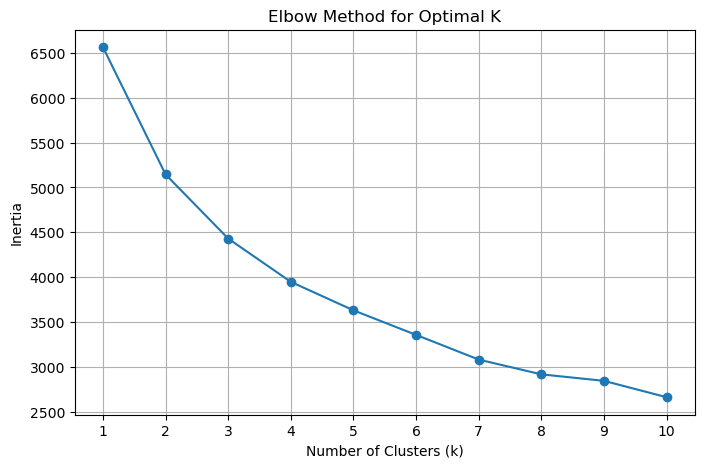

In [88]:

# Step 6: Plot the elbow curve
plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, marker="o")
plt.title("Elbow Method for Optimal K")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.xticks(k_range)
plt.grid()
plt.show()

In [115]:
from sklearn.metrics import davies_bouldin_score,silhouette_score
# Step7:Apply K-Means clustering
optimal_clusters = 4  # Set the number of clusters (e.g., based on the elbow method)
kmeans_model = KMeans(n_clusters=optimal_clusters, random_state=42)
data_cleaned["Cluster"] = kmeans_model.fit_predict(data_cleaned)

In [116]:
# Step 8: Calculate Silhouette Score and Davies-Bouldin Index
silhouette_avg = silhouette_score(data_cleaned[numerical_columns], data_cleaned["Cluster"])
db_index = davies_bouldin_score(data_cleaned[numerical_columns], data_cleaned["Cluster"])

# Step 9: Display the updated dataset with scores
print(f"Silhouette Score: {silhouette_avg}")
print(f"Davies-Bouldin Index: {db_index}")

Silhouette Score: 0.16465692644008117
Davies-Bouldin Index: 2.4223338987406002


### The Silhouette Score: 0.16465692644008117
### Davies-Bouldin Index: 2.4223338987406002


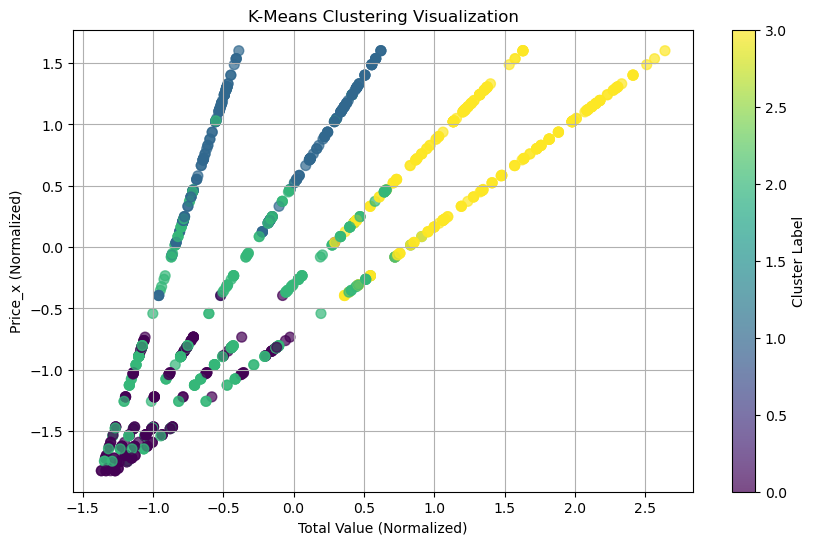

In [117]:
# Step 10 Scatter plot of clustering
plt.figure(figsize=(10, 6))
plt.scatter(
    data_cleaned["TotalValue"], 
    data_cleaned["Price_x"], 
    c=data_cleaned["Cluster"], 
    cmap="viridis", 
    s=50, 
    alpha=0.7
)
plt.title("K-Means Clustering Visualization")
plt.xlabel("Total Value (Normalized)")
plt.ylabel("Price_x (Normalized)")
plt.colorbar(label="Cluster Label")
plt.grid()
plt.show()

### DB Scan Clustring

In [104]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import DBSCAN
from sklearn.metrics import davies_bouldin_score,silhouette_score
import matplotlib.pyplot as plt

# Step 1: Load the dataset
file_path =( 'cleaned_data.csv')

In [105]:

# Step 2: Drop irrelevant columns
columns_to_drop = ["TransactionID", "CustomerID", "ProductID", "CustomerName", "ProductName", "Date", "Year"]
data_cleaned = data.drop(columns=columns_to_drop)

In [106]:
# Step 3: Encode categorical columns
label_encoders = {}
for col in ["Category", "Region"]:
    le = LabelEncoder()
    data_cleaned[col] = le.fit_transform(data_cleaned[col])
    label_encoders[col] = le

In [107]:
# Step 4: Normalize numerical columns
scaler = StandardScaler()
numerical_columns = ["Quantity", "TotalValue", "Price_x", "Month"]
data_cleaned[numerical_columns] = scaler.fit_transform(data_cleaned[numerical_columns])

In [108]:
# Step 5: Apply DBSCAN clustering
dbscan_model = DBSCAN(eps=0.5, min_samples=5)  # Adjust eps and min_samples as needed
data_cleaned["Cluster"] = dbscan_model.fit_predict(data_cleaned)

In [109]:
# Step 6: Evaluate the clustering
# Exclude noise points (-1 cluster) for metrics like silhouette score
labels = data_cleaned["Cluster"]
unique_clusters = len(set(labels)) - (1 if -1 in labels else 0)

if unique_clusters > 1:
    silhouette_avg = silhouette_score(data_cleaned[numerical_columns], labels, metric='euclidean')
    
    db_index = davies_bouldin_score(data_cleaned[numerical_columns], labels)
else:
    silhouette_avg = None
    
    db_index = None

print(f"Number of Clusters (excluding noise): {unique_clusters}")
print(f"Silhouette Score: {silhouette_avg}" if silhouette_avg else "Silhouette Score: Not applicable")
print(f"Davies-Bouldin Index: {db_index}" if db_index else "Davies-Bouldin Index: Not applicable")

Number of Clusters (excluding noise): 9
Silhouette Score: -0.4936618758439137
Davies-Bouldin Index: 1.372159359734689


### Silhouette Score: -0.4936618758439137
### Davies-Bouldin Index: 1.372159359734689


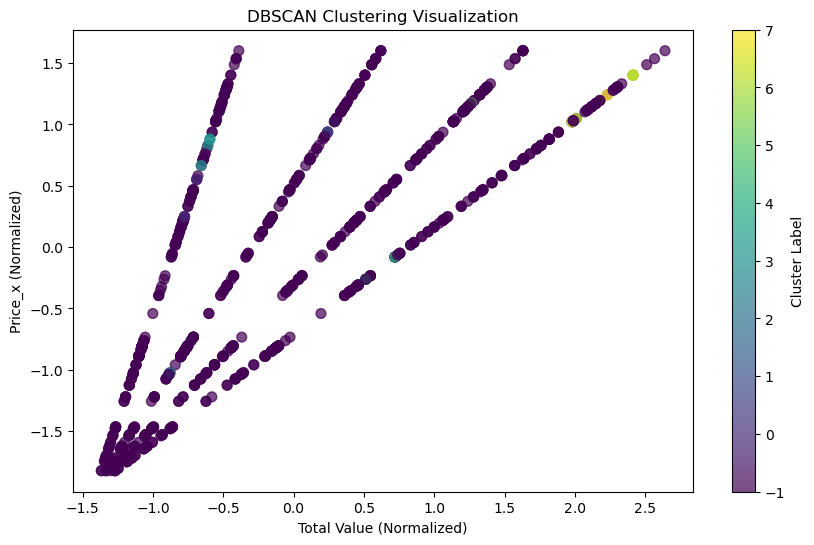

In [110]:
# Step 7: Plot the clusters
plt.figure(figsize=(10, 6))
plt.scatter(data_cleaned["TotalValue"], data_cleaned["Price_x"], c=data_cleaned["Cluster"], cmap="viridis", s=50, alpha=0.7)
plt.title("DBSCAN Clustering Visualization")
plt.xlabel("Total Value (Normalized)")
plt.ylabel("Price_x (Normalized)")
plt.colorbar(label="Cluster Label")
plt.show()
